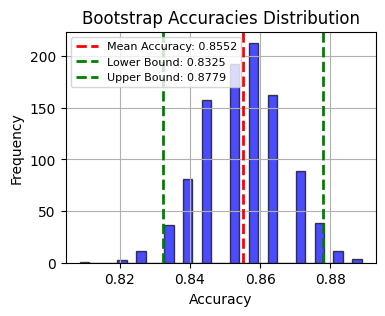

Mean Accuracy: 0.8552
Uncertainty: ±2.65%


In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the dataset with corrected file paths
x_train = pd.read_csv('../../DataSet for Training and Testing/Training_Set.csv')
x_test = pd.read_csv('../../DataSet for Training and Testing/Testing_Set .csv')
y_test = pd.read_csv('../../DataSet for Training and Testing/y_test.csv')
y_train = pd.read_csv('../../DataSet for Training and Testing/y_train.csv')

# Convert y_train and y_test to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create Logistic regression classifier object
clf = LogisticRegression()

# Number of bootstrap samples
n_bootstraps = 1000
accuracies = np.zeros(n_bootstraps)

# Fit the model on bootstrap samples and calculate accuracies
for i in range(n_bootstraps):
    # Generate a bootstrap sample
    X_resampled, y_resampled = resample(x_train, y_train)
    
    # Train Logistic regression classifier
    clf.fit(X_resampled, y_resampled)
    
    # Predict the response for test dataset
    y_pred = clf.predict(x_test)
    
    # Calculate the accuracy
    accuracies[i] = metrics.accuracy_score(y_test, y_pred)

# Calculate the mean and standard deviation of the accuracies
mean_accuracy = np.mean(accuracies)
std_dev_accuracy = np.std(accuracies)

# Calculate the uncertainty as a ± percentage
uncertainty_percentage = (1.96 * std_dev_accuracy / mean_accuracy) * 100

# Plotting
plt.figure(figsize=(4, 3))
plt.hist(accuracies, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(mean_accuracy, color='red', linestyle='dashed', linewidth=2, label=f'Mean Accuracy: {mean_accuracy:.4f}')
plt.axvline(mean_accuracy - 1.96 * std_dev_accuracy, color='green', linestyle='dashed', linewidth=2, label=f'Lower Bound: {(mean_accuracy - 1.96 * std_dev_accuracy):.4f}')
plt.axvline(mean_accuracy + 1.96 * std_dev_accuracy, color='green', linestyle='dashed', linewidth=2, label=f'Upper Bound: {(mean_accuracy + 1.96 * std_dev_accuracy):.4f}')

plt.title('Bootstrap Accuracies Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend(fontsize=8)
plt.grid(True)

plt.show()

print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Uncertainty: ±{uncertainty_percentage:.2f}%')